In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('loan_train.csv')
df_test = pd.read_csv('loan_test.csv')

In [3]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [4]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [6]:
df_train.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [7]:
def to_fill(dataset):
    for i in dataset.columns:
        if dataset[i].isnull().any():
            if dataset[i].dtypes == 'O':
                dataset[i].fillna('unknow', inplace = True)
            else:
                dataset[i].fillna(dataset[i].mean(), inplace = True)

In [8]:
to_fill(df_train)
to_fill(df_test)

In [9]:
df_train.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [10]:
df_train['Status'].value_counts()

Y    422
N    192
Name: Status, dtype: int64

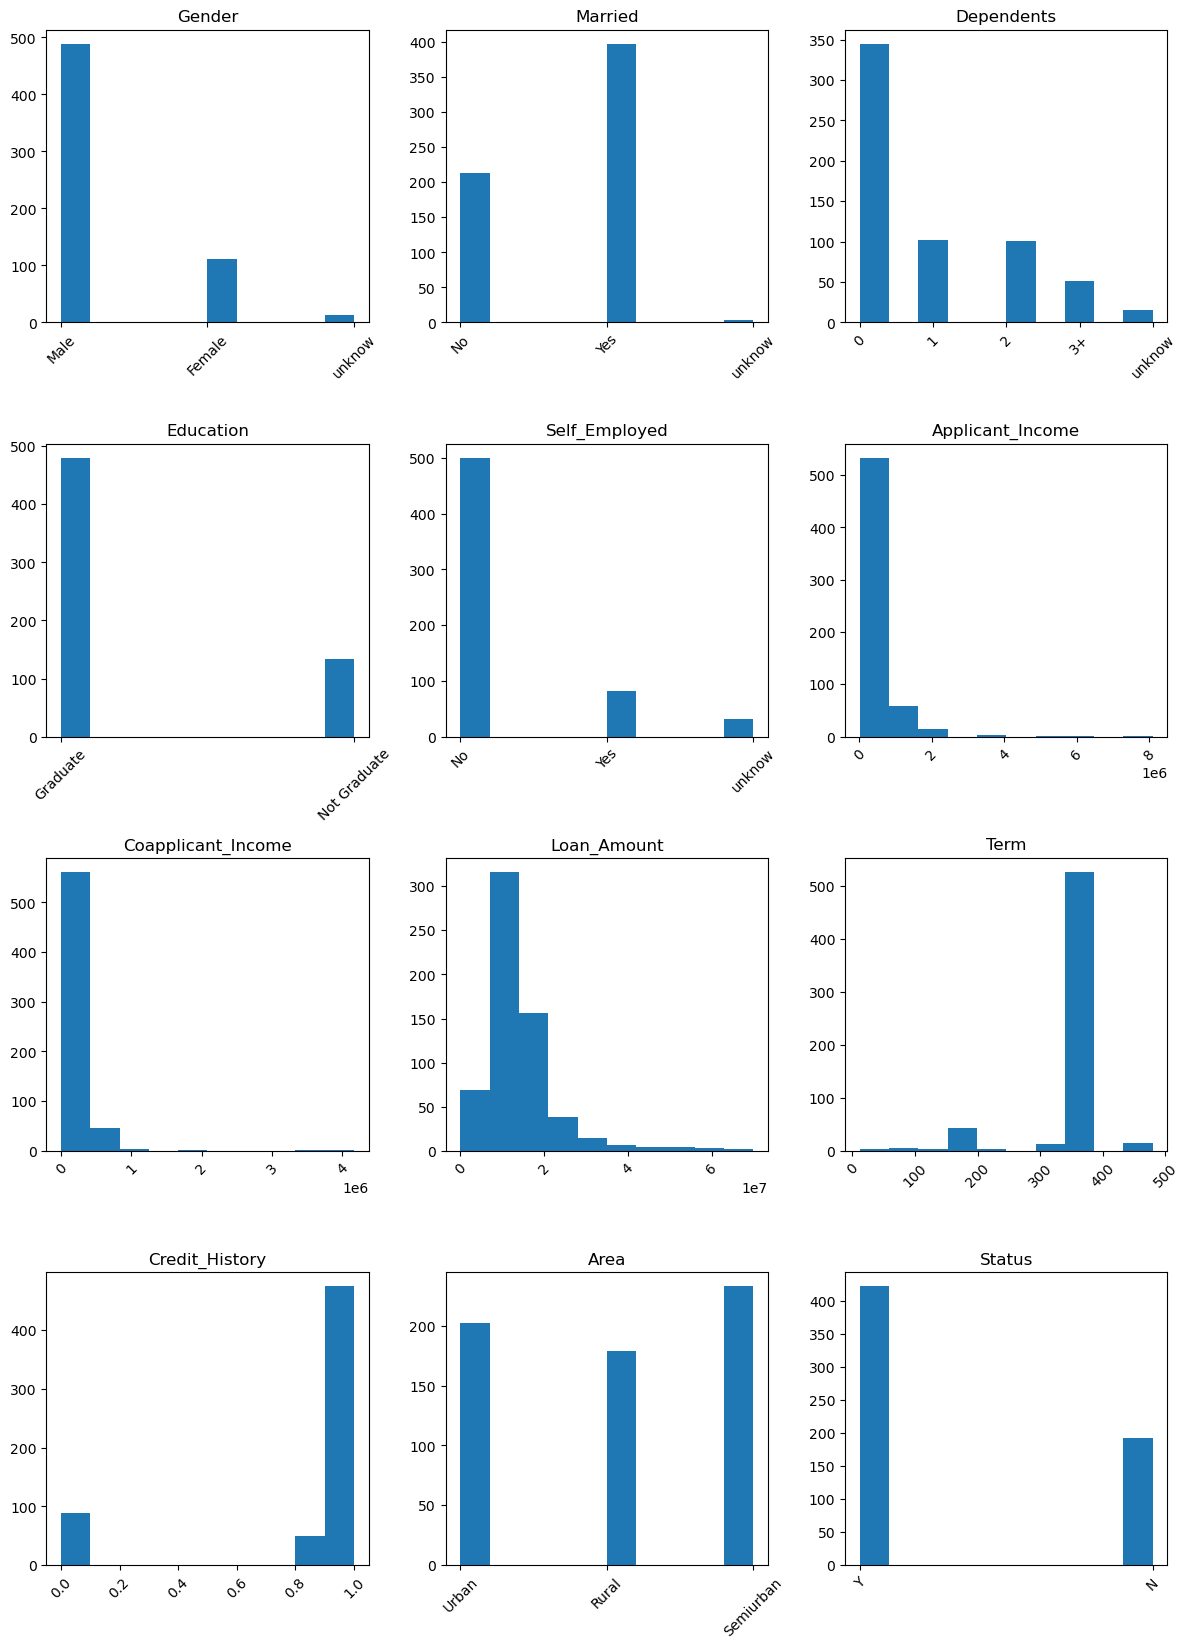

In [11]:
lista_colunas = list(df_train.columns)
plt.figure(figsize = (12, 20))

for i in range(len(lista_colunas)):
    plt.subplot(5, 3, i + 1)
    plt.title(lista_colunas[i])
    plt.xticks(rotation = 45)
    plt.hist(df_train[lista_colunas[i]])
    
plt.tight_layout()

## LabelEncoder

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

str_col = df_train.select_dtypes(include = 'object').columns

for c in str_col:
    df_train[c] = le.fit_transform(df_train[c])

In [13]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1


<AxesSubplot:>

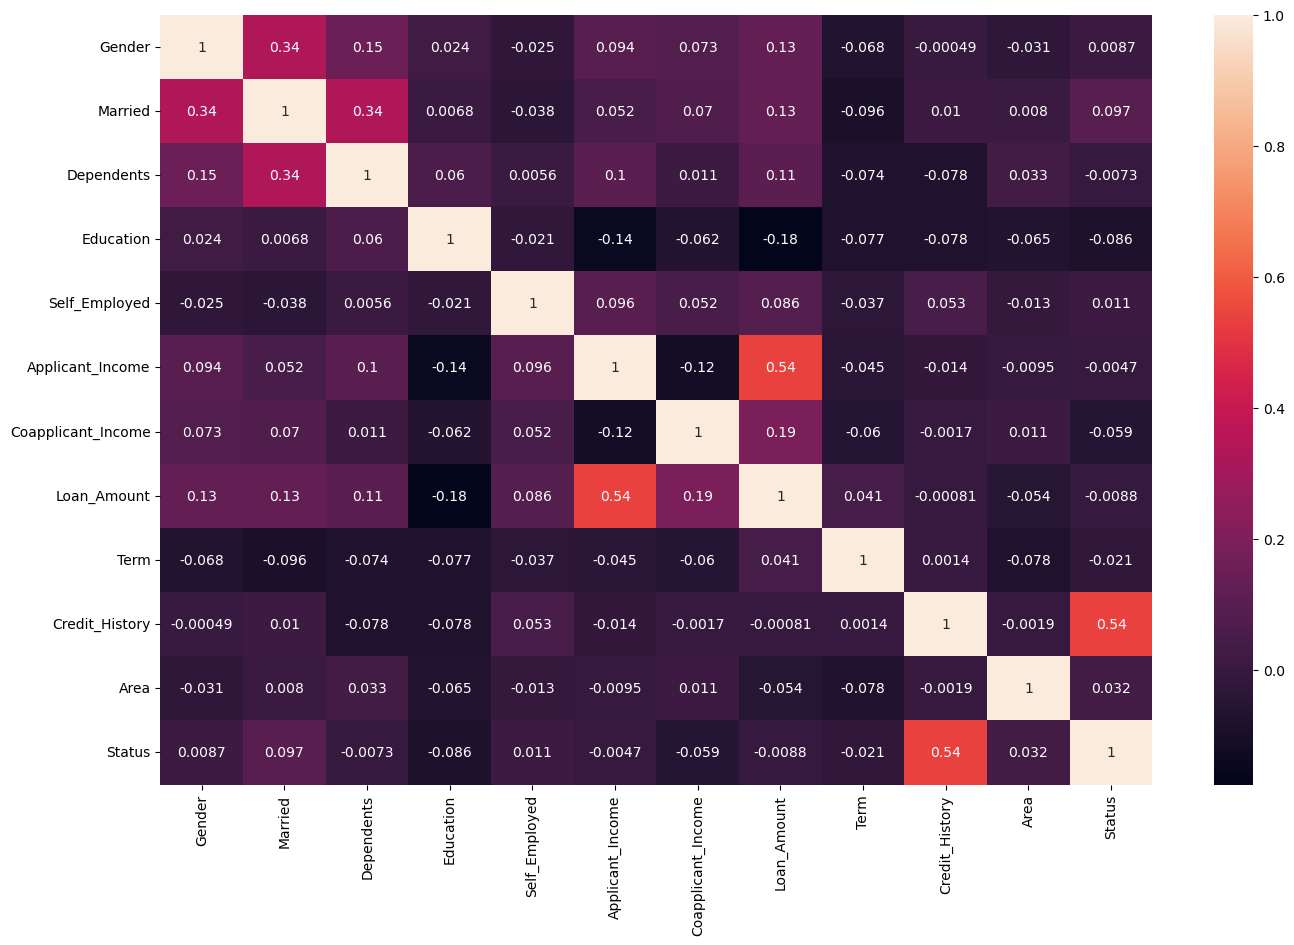

In [14]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True)

In [15]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1


## Train  Test

In [16]:
from sklearn.model_selection import train_test_split

X = df_train.drop('Status', axis = 1)
y = df_train['Status']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [17]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state = 0)
xtrain_res, ytrain_res = smt.fit_resample(xtrain, ytrain)

print(f'Distribuição ANTES do balanceamento:\n{ytrain.value_counts()}')
print()
print(f'Distribuição DEPOIS do balanceamento:\n{ytrain_res.value_counts()}')

Distribuição ANTES do balanceamento:
1    342
0    149
Name: Status, dtype: int64

Distribuição DEPOIS do balanceamento:
0    342
1    342
Name: Status, dtype: int64


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 3, random_state = 0)

rf.fit(xtrain_res, ytrain_res)

RandomForestClassifier(max_depth=3, random_state=0)

In [19]:
ypred = rf.predict(xtest)

from sklearn.metrics import accuracy_score
print('accuracy:', accuracy_score(ytest, ypred))

accuracy: 0.7967479674796748


# Dataset TEST

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

str_col = df_test.select_dtypes(include = 'object').columns

for c in str_col:
    df_test[c] = le.fit_transform(df_test[c])

In [21]:
test_predict = rf.predict(df_test)
test_result = pd.DataFrame(df_test)

test_result['predicted_status'] = test_predict

# DATASET FINAL

In [22]:
test_result.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,predicted_status
0,1,1,0,0,0,572000,0,11000000,360.0,1.000000,2,1
1,1,1,1,0,0,307600,150000,12600000,360.0,1.000000,2,1
2,1,1,2,0,0,500000,180000,20800000,360.0,1.000000,2,1
3,1,1,2,0,0,234000,254600,10000000,360.0,0.825444,2,0
4,1,0,0,1,0,327600,0,7800000,360.0,1.000000,2,1


_